In [3]:
import matplotlib.pyplot as plt
import numpy as np

edo_functions: Document was read


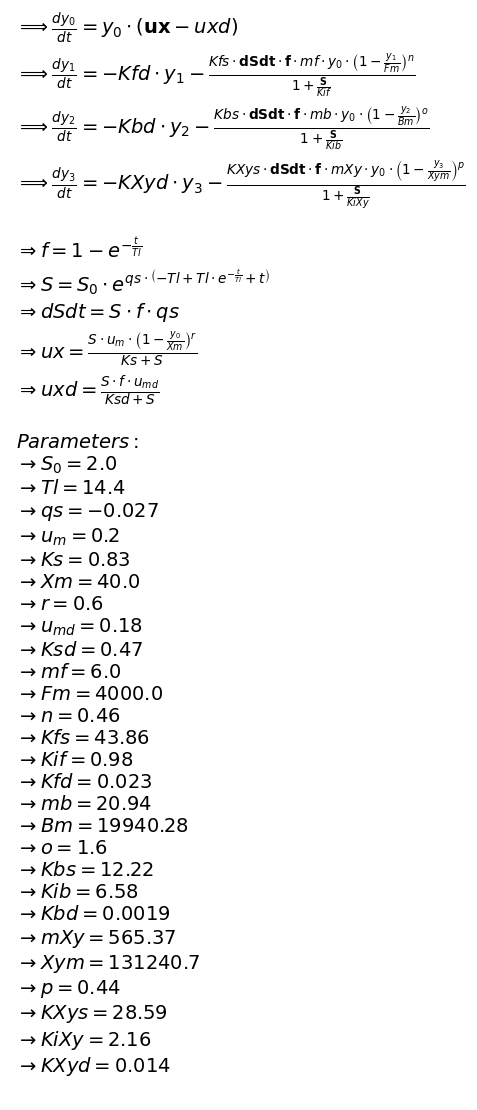

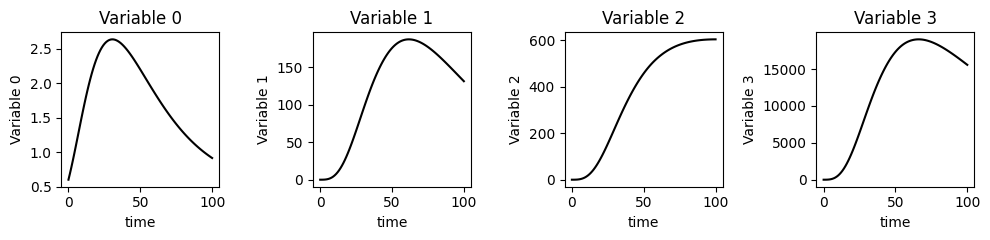

In [4]:
edo = solver.edo_functions('tests/edo_gelain2015.py')
y0 =  [0.6, 0, 0, 0]
edo.solve([0,100], y0)

In [3]:
data.loc[ data['enzyme_loading'] == 10]

,assay,figure_location,enzyme_loading,solid_loading,celulose0,hemicelulose0,enzyme_total,G0,G20,X0,time,G,G2,X,free_enzyme
1,ref_condition,fig2,10,15,99.75,12.45,0.176897,0,0,0,1,8.789644,NaN,1.4489,0.000015
2,ref_condition,fig2,10,15,99.75,12.45,0.176897,0,0,0,2,13.27508,0.367695,2.018111,0.000015
3,ref_condition,fig2,10,15,99.75,12.45,0.176897,0,0,0,4,23.06149,0.709127,2.871928,0.000015
4,ref_condition,fig2,10,15,99.75,12.45,0.176897,0,0,0,6,28.81553,0.814183,3.221216,0.000015
5,ref_condition,fig2,10,15,99.75,12.45,0.176897,0,0,0,8,33.02913,0.945502,3.531695,0.000015
6,ref_condition,fig2,10,15,99.75,12.45,0.176897,0,0,0,12,37.19741,1.076822,3.85511,0.000015
7,ref_condition,fig2,10,15,99.75,12.45,0.176897,0,0,0,24,45.35275,1.431385,4.463131,0.000015
8,ref_condition,fig2,10,15,99.75,12.45,0.176897,0,0,0,48,53.64401,1.103086,7.736093,0.000015
9,ref_condition,fig2,10,15,99.75,12.45,0.176897,0,0,0,72,55.86408,0.945502,7.943079,0.000015
10,ref_condition,fig2,10,15,99.75,12.45,0.176897,0,0,0,96,57.94822,0.945502,8.35705,0.000015


edo_functions: Document was read


 47%|####6     | 47/100 [53:22<1:00:11, 68.15s/it]


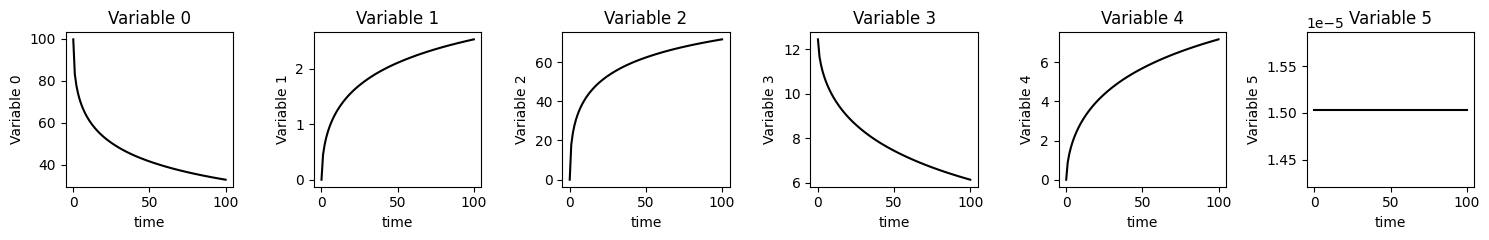

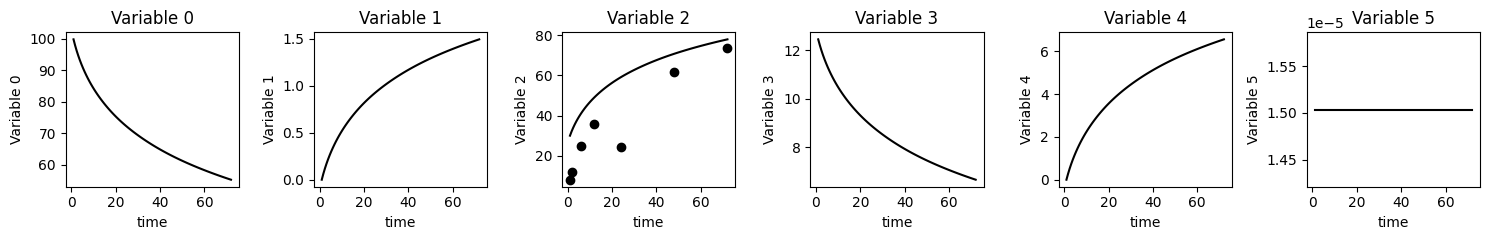

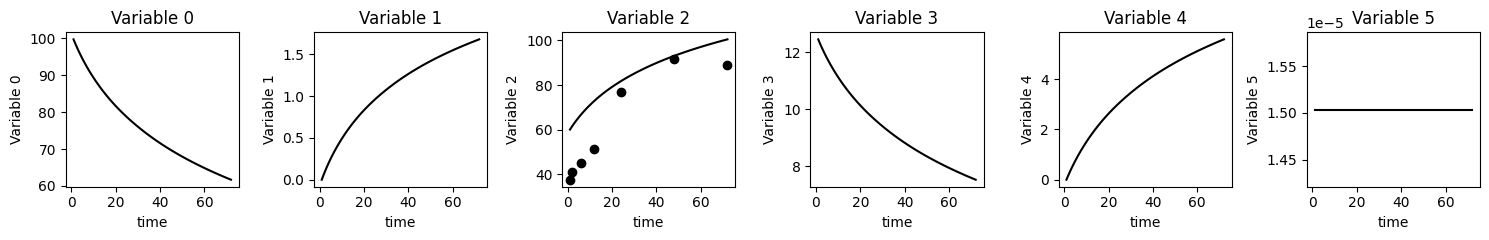

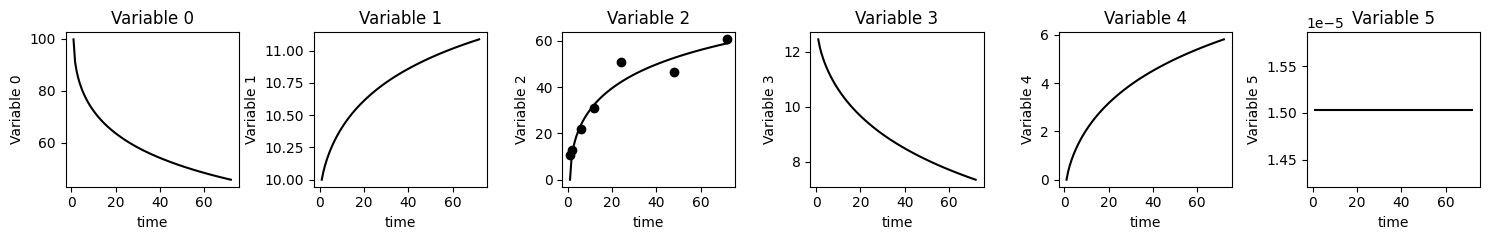

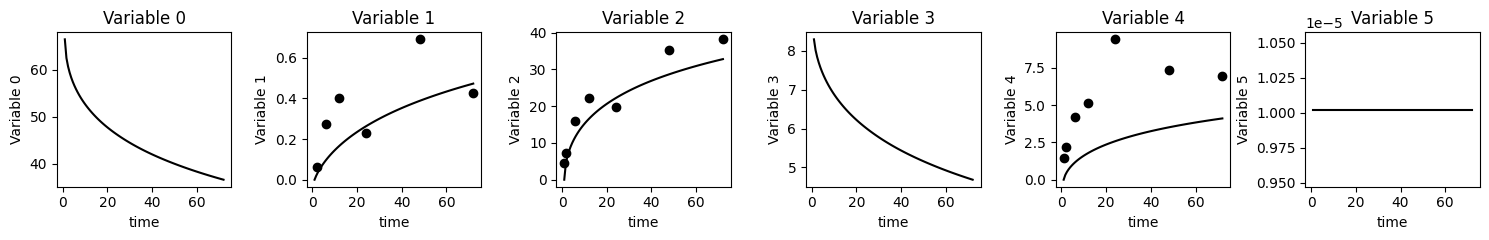

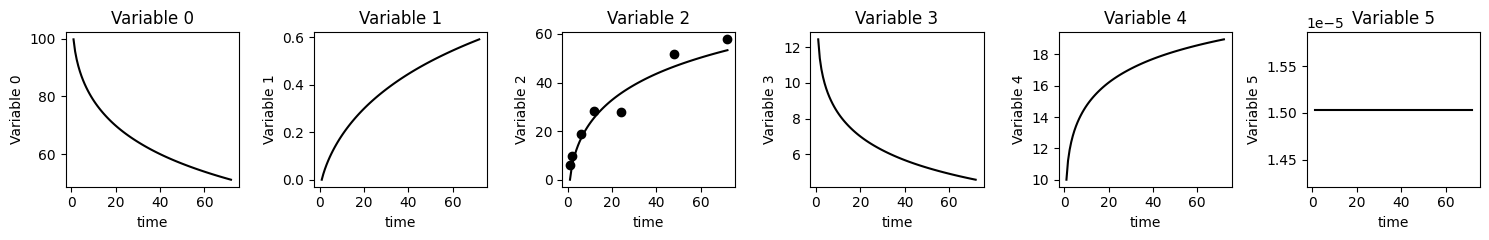

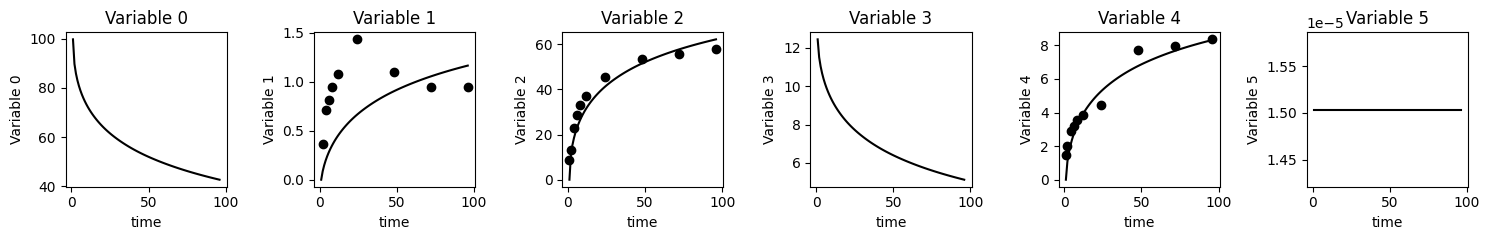

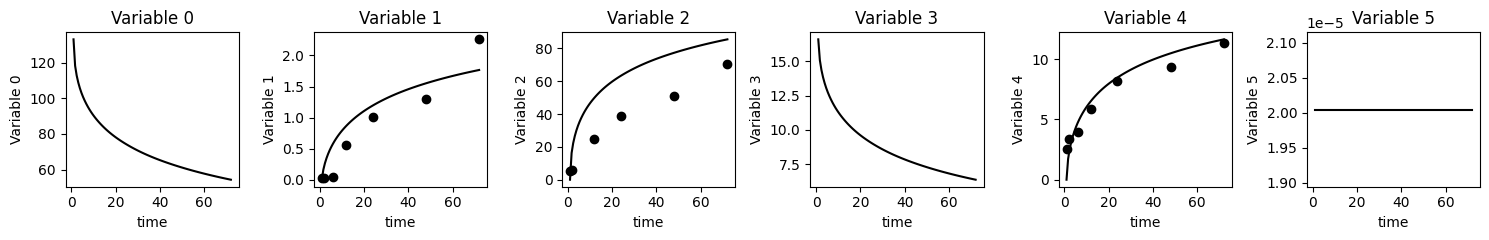

In [4]:
bounds = {
        # 'solids0': 10.0,
        # 'enzyme0': 15.0,
        # 'Emax': 8.32,
        # 'Kad': 7.16,
        'K1r': (0.0001, 1),
        'K1IG2': (0.1, 50),
        'K1IG': (1, 100),
        'K1IX': (0.001, 4),
        'K2r': (0.1, 20),
        'K2IG2': (50, 500),
        'K2IG': (1, 200),
        'K2IX': (0.01, 1),
        'K3r': (100, 500),
        'K3M': (0.1, 100),
        'K3IG': (5, 80),
        'K3IX': (0.5, 10),
        'K4r': (0.1, 3),
        'K4IG2': (0.1, 60),
        'K4IG': (1, 1000),
        'K4IX': (50, 500)
        }

from procmodeling import solver
import pandas as pd
import numpy as np

data = pd.read_excel('tests/dados_javier2015.xlsx')
data.drop(0, inplace=True)
data['free_enzyme'] = data['enzyme_total']*0.000085 # Arbitrary value
data.head()

initial_conditions_col = ['celulose0', 'G20', 'G0', 'hemicelulose0', 'X0', 'free_enzyme']

y0 = data.loc[ data['assay'] == 'ref_condition', initial_conditions_col ].loc[1].values

edo = solver.edo_functions('tests/edo_angarita2015.py', verbose=False)
results = edo.solve([0,100], y0)


edo.optimize(
    data.loc[ data['enzyme_loading'] == 10],
    initial_conditions_col,
    [None, 'G2', 'G', None, 'X', None],
    'time',
    bounds
    )

fobj = edo._call_objective_function()
res = fobj(edo.params.values())

In [5]:
edo.opt_result

             message: Optimization terminated successfully.
             success: True
                 fun: 62.93534145473017
                   x: [ 7.505e-03  4.270e+01 ...  4.242e+00  5.000e+01]
                 nit: 47
                nfev: 13458
          population: [[ 1.876e-02  4.712e+01 ...  9.343e+01  5.548e+01]
                       [ 1.376e-02  4.633e+01 ...  4.278e+02  6.311e+01]
                       ...
                       [ 3.063e-02  2.062e+01 ...  5.360e+02  2.144e+02]
                       [ 3.668e-02  1.504e+01 ...  1.958e+02  2.187e+02]]
 population_energies: [ 6.294e+01  6.462e+01 ...  6.552e+01  6.443e+01]
                 jac: [-2.513e-02 -2.132e-05 ... -4.484e-03  7.510e-04]

In [8]:
edo.opt_params

{'K1r': np.float64(0.007504887115356107),
 'K1IG2': np.float64(42.69598925653702),
 'K1IG': np.float64(70.35846123359136),
 'K1IX': np.float64(3.9998765278525346),
 'K2r': np.float64(5.108812180305352),
 'K2IG2': np.float64(183.04802582337146),
 'K2IG': np.float64(1.0),
 'K2IX': np.float64(1.0),
 'K3r': np.float64(218.82049183254045),
 'K3M': np.float64(49.08384507393798),
 'K3IG': np.float64(18.291779125247103),
 'K3IX': np.float64(1.8459123632966732),
 'K4r': np.float64(1.3485125639604854),
 'K4IG2': np.float64(2.5778299292818794),
 'K4IG': np.float64(4.241576520216834),
 'K4IX': np.float64(50.0)}

edo_functions: Document was read


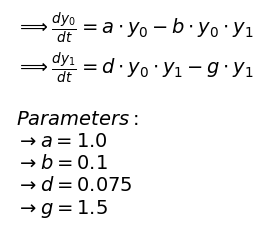

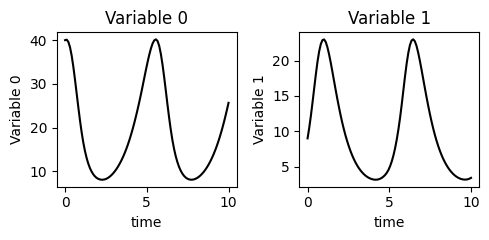

In [7]:
edo = solver.edo_functions('Lotka_Volterra_EDO.txt')
edo.solve([0,10], [40, 9])

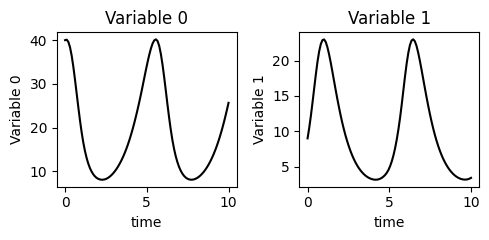

In [82]:
import numpy as np
import sounddevice as sd

# Parâmetros do som
fs = 44100  # Taxa de amostragem (Hz)
duration = 2  # Duração em segundos
# frequency = 440  # Frequência (Hz)
frequency = [440, 500, ]
# Criando a onda sonora (senoidal)
t = np.linspace(0, duration, int(fs * duration), False)
# wave = 0.5 * np.sin(2 * np.pi * frequency * t)
def f_wave(temp, freq):
    if temp<1:
        return 0.5 * np.sin(2 * np.pi * freq[0] * temp)
    else:
        return 0.5 * np.sin(2 * np.pi * freq[1] * temp)

wave = [ f_wave(i, frequency) for i in t]
print(wave)
# Tocar o som
sd.play(wave, samplerate=fs)
sd.wait()  # Espera até o som terminar

[0.0, 0.03132416208937184, 0.06252526184726405, 0.09348072041362668, 0.12406892397186894, 0.15416970152955017, 0.18366479703068941, 0.21243833394491923, 0.24037727050826585, 0.2673718438270648, 0.2933160011002728, 0.3181078162660465, 0.34164989043571936, 0.3638497345420047, 0.3846201326981244, 0.4038794848403462, 0.42155212730779873, 0.4375686301001122, 0.4518660696450567, 0.4643882760045642, 0.47508605354794337, 0.48391737422533326, 0.49084754268209035, 0.49584933256542657, 0.4989030934877958, 0.4999968282268042, 0.49912623985835136, 0.49629474863783246, 0.49151347856307914, 0.48480121367183043, 0.4761843242454261, 0.4656966632086431, 0.45337943313268747, 0.43928102436384187, 0.4234568249137088, 0.4059690028579282, 0.38688626209825333, 0.3662835724475143, 0.34424187509787935, 0.32084776462952763, 0.29619314880902387, 0.2703748875139266, 0.24349441220218354, 0.21565732742129134, 0.18697299592275615, 0.15755410901181022, 0.12751624382033191, 0.09697740924230566, 0.0660575823156838, 0.03

In [60]:
t

array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
       1.99993197e+00, 1.99995465e+00, 1.99997732e+00])

(0.0, 0.1)

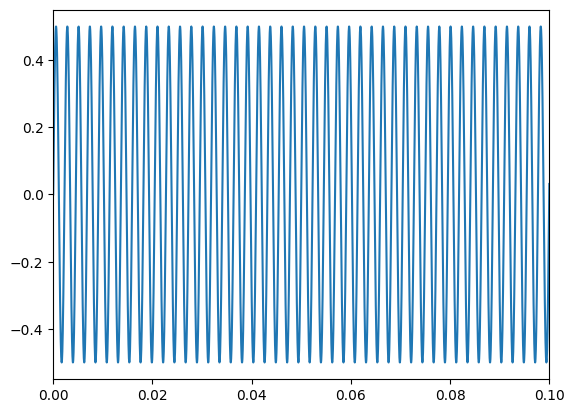

In [42]:
import matplotlib.pyplot as plt
plt.plot( t, wave)
plt.xlim([0,0.1])

# aaa

In [4]:
from graphviz import Digraph

dot = Digraph()
dot.node('A', 'Início')
dot.node('B', 'Processo')
dot.edge('A', 'B')

dot.render('meu_fluxo', format='png', view=True)


<class 'graphviz.backend.execute.ExecutableNotFound'>: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [4]:
from graphviz import Digraph

dot = Digraph()

dot.node('A', 'Início')
dot.node('B', 'Processo 1')
dot.node('C', 'Decisão?')
dot.node('D', 'Sim')
dot.node('E', 'Não')

dot.edges(['AB', 'BC'])
dot.edge('C', 'D', label='Sim')
dot.edge('C', 'E', label='Não')

dot.render('fluxograma', format='png', view=True)




'fluxograma.png'

In [5]:
from diagrams import Diagram
from diagrams.generic.blank import Blank

with Diagram("Exemplo de Fluxo"):
    start = Blank("Início")
    process = Blank("Processo")
    end = Blank("Fim")

    start >> process >> end



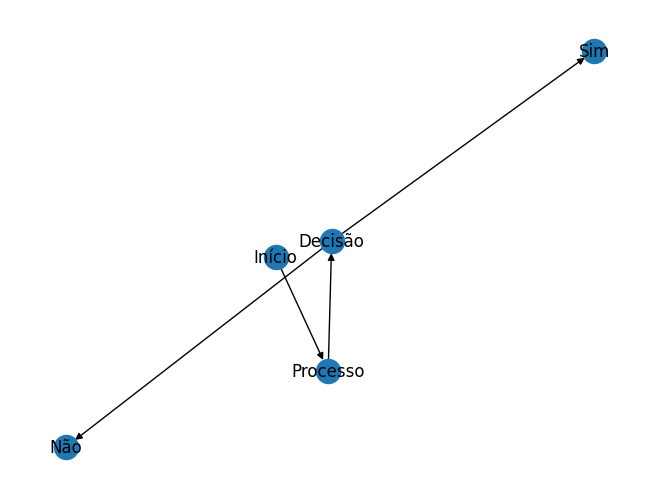

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edge("Início", "Processo")
G.add_edge("Processo", "Decisão")
G.add_edge("Decisão", "Sim")
G.add_edge("Decisão", "Não")

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, arrows=True)
plt.show()


C:/Users/LHUCAS~1/AppData/Local/Temp/xpython_15928/4241296411.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


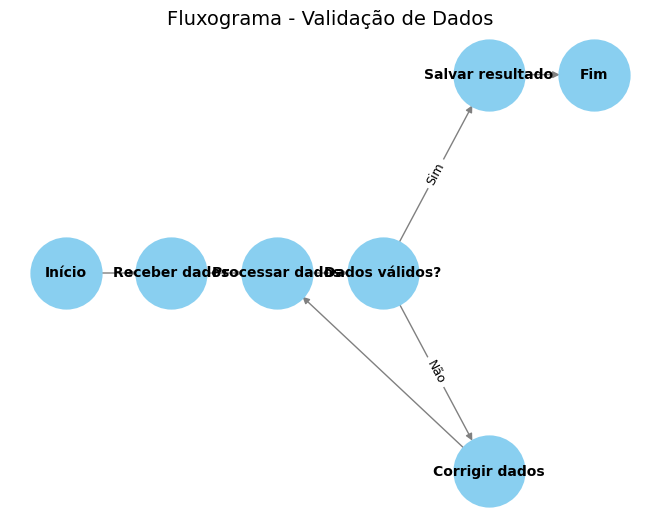

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

# Criando o grafo
G = nx.DiGraph()

# Adicionando os nós (etapas do fluxograma)
G.add_node("Start", label="Início")
G.add_node("A", label="Receber dados")
G.add_node("B", label="Processar dados")
G.add_node("C", label="Dados válidos?")
G.add_node("D", label="Salvar resultado")
G.add_node("E", label="Corrigir dados")
G.add_node("End", label="Fim")

# Adicionando as conexões
G.add_edges_from([
    ("Start", "A"),
    ("A", "B"),
    ("B", "C"),
    ("C", "D"),
    ("C", "E"),
    ("D", "End"),
    ("E", "B")
])

# Posição dos nós para manter layout manual (mais bonito)
pos = {
    "Start": (0, 3),
    "A": (1, 3),
    "B": (2, 3),
    "C": (3, 3),
    "D": (4, 4),
    "E": (4, 2),
    "End": (5, 4)
}

# Estilo dos nós
node_labels = nx.get_node_attributes(G, 'label')
nx.draw(G, pos, with_labels=False, node_color="#89CFF0", node_size=2500, edge_color="gray", arrows=True, linewidths=2, font_size=10)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight='bold')

# Rótulos dos caminhos de decisão
edge_labels = {
    ("C", "D"): "Sim",
    ("C", "E"): "Não"
}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="black", font_size=9)

plt.title("Fluxograma - Validação de Dados", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()
